<a href="https://colab.research.google.com/github/EllenaValentina/Artificial-Intelligence/blob/main/UAS%20-%20AI%20-%20EllenaValentina-20220801022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Langkah 1: Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Langkah 2: Unggah Dataset
uploaded = files.upload()  # Pilih file netflix_titles.csv dari komputer Anda

# Membaca dataset
df = pd.read_csv('netflix_titles.csv')

# Menampilkan info awal dataset
print(df.info())
df.head()


Saving netflix_titles.csv to netflix_titles.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Preprocessing Data

In [2]:
# Menghapus baris dengan nilai kosong pada fitur utama
df = df.dropna(subset=['rating', 'duration', 'release_year'])

# Mengubah 'type' menjadi angka (Movie = 0, TV Show = 1)
df['type'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# Mengubah 'duration' ke dalam format angka (dalam menit)
def convert_duration(value):
    if 'min' in value:
        return int(value.replace(' min', ''))
    elif 'Season' in value:
        return int(value.split()[0]) * 60  # 1 season ≈ 60 menit
    return np.nan

df['duration'] = df['duration'].apply(convert_duration)

# Mengisi nilai NaN dengan median dari durasi
df['duration'].fillna(df['duration'].median(), inplace=True)

# Mengubah rating menjadi angka kategori
rating_mapping = {rating: idx for idx, rating in enumerate(df['rating'].unique())}
df['rating'] = df['rating'].map(rating_mapping)

# Memilih fitur untuk clustering
features = ['type', 'release_year', 'rating', 'duration']
X = df[features]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<ipython-input-2-46b63925d6d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].map({'Movie': 0, 'TV Show': 1})
<ipython-input-2-46b63925d6d2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].apply(convert_duration)
<ipython-input-2-46b63925d6d2>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wor

Clustering dengan metode Elbow

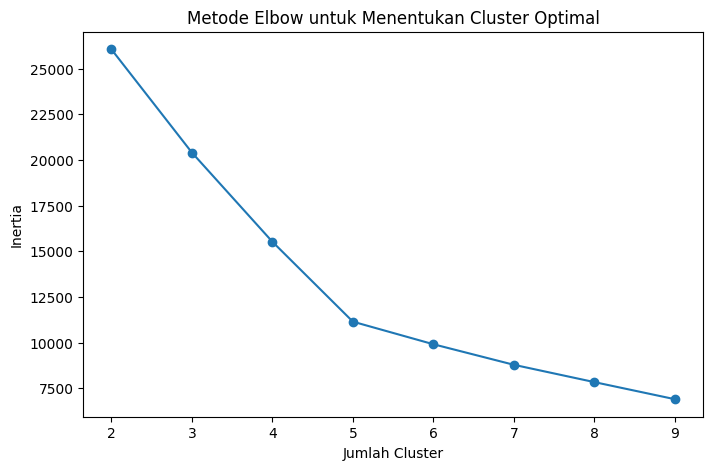

In [3]:
# Menentukan jumlah cluster dengan Elbow Method
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Cluster Optimal')
plt.show()


Penggabungan dengan Machine Learning

cluster
2    4571
0    2623
1    1606
Name: count, dtype: int64


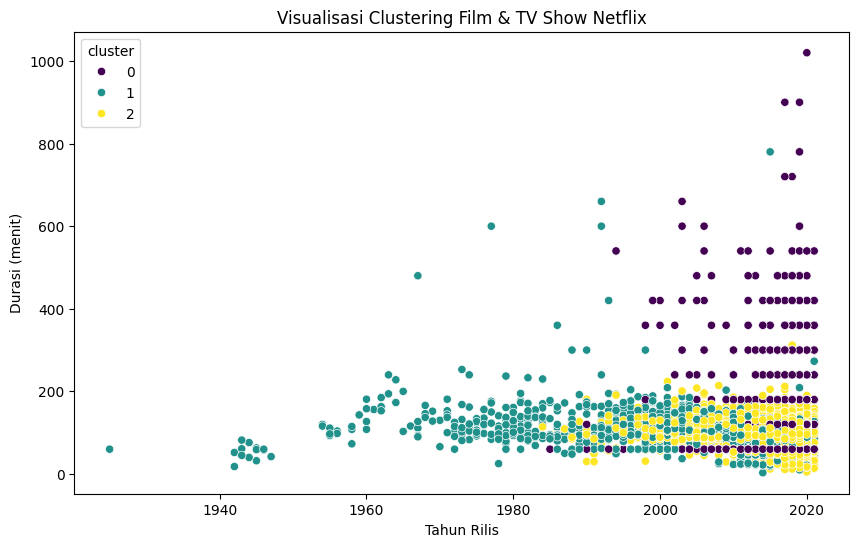

In [4]:
# Menjalankan K-Means dengan K=3 (bisa disesuaikan berdasarkan Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Menampilkan jumlah anggota di setiap cluster
print(df['cluster'].value_counts())

# Visualisasi Cluster berdasarkan Tahun Rilis dan Durasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['release_year'], y=df['duration'], hue=df['cluster'], palette='viridis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Durasi (menit)')
plt.title('Visualisasi Clustering Film & TV Show Netflix')
plt.show()


Evaluasi

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Menentukan fitur dan target untuk klasifikasi
X_ml = df[['release_year', 'duration', 'cluster']]
y_ml = df['type']  # Apakah Movie (0) atau TV Show (1)

# Membagi data menjadi training & testing
X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

# Melatih model klasifikasi (contoh: Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi hasil
y_pred = model.predict(X_test)

# Mengevaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')


Akurasi Model: 1.00
